In [1]:
import pandas as pd
import matplotlib
import warnings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab
import math

In [2]:
df_scroll_implicit = pd.read_csv('scroll_implicit.csv')
df_scroll_median = pd.read_csv('scroll_median.csv')
df_scroll_mobile = pd.read_csv('mobile_scroll.csv')

#df_scroll_mobile = df_scroll_mobile.sort_values('sitename')
#df_scroll_implicit = df_scroll_implicit.sort_values('sitename')
#df_scroll_median = df_scroll_median.sort_values('sitename')

#df_js_data
#df_mobile_scroll


In [3]:
df_scroll_mobile['image_percent'] = df_scroll_mobile['img']/df_scroll_mobile['total']
df_scroll_implicit['image_percent'] = df_scroll_implicit['img']/df_scroll_implicit['total']
df_scroll_median['image_percent'] = df_scroll_median['img']/df_scroll_median['total']

df_scroll_mobile['js_percent'] = df_scroll_mobile['js']/df_scroll_mobile['total']
df_scroll_implicit['js_percent'] = df_scroll_implicit['js']/df_scroll_implicit['total']
df_scroll_median['js_percent'] = df_scroll_median['js']/df_scroll_median['total']

df_scroll_mobile = df_scroll_mobile.sort_values('category', ascending=False)
df_scroll_mobile

,sitename,value,category,js,img,total,image_percent,js_percent
7,bleacherreport.com,120000,Sports,89,165,483,0.341615,0.184265
32,rantsports.com,87959,Sports,25,36,105,0.342857,0.238095
46,whitehouse.gov,11571,Society,8,19,51,0.372549,0.156863
40,stubhub.com,6960,Shopping,54,35,153,0.228758,0.352941
13,costco.com,41371,Shopping,22,37,95,0.389474,0.231579
23,macys.com,30723,Shopping,76,28,215,0.130233,0.353488
4,amazon.com,5996,Shopping,17,31,103,0.300971,0.165049
43,theonion.com,45117,Shopping,49,14,211,0.066351,0.232227
29,overstock.com,12237,Shopping,32,27,149,0.181208,0.214765
33,retailmenot.com,8108,Shopping,16,39,102,0.382353,0.156863


In [11]:
# df_scroll_implicit = df_scroll_implicit.sort_values('category', ascending=False)
# df_scroll_implicit

In [4]:
df_mobile = df_scroll_mobile.groupby(['category'], as_index = False).mean()
df_implicit = df_scroll_implicit.groupby(['category'], as_index = False).mean()
df_median = df_scroll_median.groupby(['category'], as_index = False).mean()



#df_temp = df_scroll_mobile.groupby('category').agg(np.std, ddof=1)
#df_temp['total']
#df_mobile
#df_temp


df_mobile_new=pd.DataFrame(columns=['category','value_mean','js_mean','img_mean','total_mean',
                                    'value_std','js_std','img_std', 'total_std'])
df_implicit_new=pd.DataFrame(columns=['category','value_mean','js_mean','img_mean',
                                    'value_std','total_mean','js_std','img_std', 'total_std'])
df_median_new=pd.DataFrame(columns=['category','value_mean','js_mean','img_mean',
                                    'value_std','total_mean','js_std','img_std', 'total_std'])

df_mobile_new['category'] = df_mobile['category']
df_implicit_new['category'] = df_mobile['category']
df_median_new['category'] = df_mobile['category']

for index,row in df_mobile.iterrows():
    df_mobile_new.loc[df_mobile_new.category == row['category'], 'img_mean']=row['image_percent']
    df_mobile_new.loc[df_mobile_new.category == row['category'], 'js_mean']=row['js_percent']
    df_mobile_new.loc[df_mobile_new.category == row['category'], 'value_mean']=row['value']
    df_mobile_new.loc[df_mobile_new.category == row['category'], 'total_mean']=row['total']

for index,row in df_implicit.iterrows():
    df_implicit_new.loc[df_implicit_new.category == row['category'], 'img_mean']=row['image_percent']
    df_implicit_new.loc[df_implicit_new.category == row['category'], 'js_mean']=row['js_percent']
    df_implicit_new.loc[df_implicit_new.category == row['category'], 'value_mean']=row['value']
    df_implicit_new.loc[df_implicit_new.category == row['category'], 'total_mean']=row['total']

for index,row in df_median.iterrows():
    df_median_new.loc[df_median_new.category == row['category'], 'img_mean']=row['image_percent']
    df_median_new.loc[df_median_new.category == row['category'], 'js_mean']=row['js_percent']
    df_median_new.loc[df_median_new.category == row['category'], 'value_mean']=row['value']
    df_median_new.loc[df_median_new.category == row['category'], 'total_mean']=row['total']
    

df_mobile = df_scroll_mobile.groupby(['category'], as_index = False).agg(np.std, ddof=1)
df_implicit = df_scroll_implicit.groupby(['category'], as_index = False).agg(np.std, ddof=1)
df_median = df_scroll_median.groupby(['category'], as_index = False).agg(np.std, ddof=1)
                      

for index,row in df_mobile.iterrows():
    df_mobile_new.loc[df_mobile_new.category == row['category'], 'img_std']=row['image_percent']
    df_mobile_new.loc[df_mobile_new.category == row['category'], 'js_std']=row['js_percent']
    df_mobile_new.loc[df_mobile_new.category == row['category'], 'value_std']=row['value']
    df_mobile_new.loc[df_mobile_new.category == row['category'], 'total_std']=row['total']
  
for index,row in df_implicit.iterrows():
    df_implicit_new.loc[df_implicit_new.category == row['category'], 'img_std']=row['image_percent']
    df_implicit_new.loc[df_implicit_new.category == row['category'], 'js_std']=row['js_percent']
    df_implicit_new.loc[df_implicit_new.category == row['category'], 'value_std']=row['value']
    df_implicit_new.loc[df_implicit_new.category == row['category'], 'total_std']=row['total']

for index,row in df_median.iterrows():
    df_median_new.loc[df_median_new.category == row['category'], 'img_std']=row['image_percent']
    df_median_new.loc[df_median_new.category == row['category'], 'js_std']=row['js_percent']
    df_median_new.loc[df_median_new.category == row['category'], 'value_std']=row['value']
    df_median_new.loc[df_median_new.category == row['category'], 'total_std']=row['total']
    
#print (df_mobile)
df_mobile_new = df_mobile_new.sort_values('value_mean', ascending=False)
df_mobile_new
    

,category,value_mean,js_mean,img_mean,total_mean,value_std,js_std,img_std,total_std
12,Sports,103980,0.21118,0.342236,294,22656.4,0.0380637,0.000878394,267.286
6,News,70244,0.206234,0.213985,217.4,38504.1,0.0568736,0.134744,68.2334
3,Health,58842.5,0.236017,0.213585,147,30986.1,0.0275163,0.0852776,14.1421
8,Reference,39324,0.233529,0.134103,246.5,8793.58,0.00468549,0.0336463,241.123
7,Recreational,32041,0.231214,0.300578,173,NaN,NaN,NaN,NaN
4,Home,30086.5,0.306514,0.165211,200.75,26944,0.146844,0.173123,202.111
2,Games,29937.3,0.276404,0.273803,169,23859.3,0.218618,0.368041,120.449
5,Kids and Teens,26604.5,0.305556,0.269807,148.5,10917,0.0392837,0.231261,82.7315
1,Computer,20873.5,0.273437,0.257972,117.455,25502.5,0.151529,0.147294,122.486
9,Science,20723,0.211607,0.436291,92.5,8807.72,0.112475,0.276881,19.0919


In [13]:
# df_median_new = df_median_new.sort_values('value_mean', ascending=False)
# df_median_new

In [14]:
# df_implicit_new = df_implicit_new.sort_values('value_mean', ascending=False)
# df_implicit_new

In [19]:
# df_mobile.plot(kind='bar', x='category', y='value', title='OnLoad - Category')
# plt.rcParams["figure.figsize"] = (20,5)
# #plt.show()

# df_implicit.plot(kind='bar', x='category', y='value', title='Implicit - Category')
# plt.rcParams["figure.figsize"] = (20,5)
# #plt.show()

# df_median.plot(kind='bar', x='category', y='value', title='Median - Category')
# plt.rcParams["figure.figsize"] = (20,5)
# #plt.show()

# df_mobile.plot(kind='bar', x='category', y='js', title='OnLoad - JS')
# plt.rcParams["figure.figsize"] = (20,5)
# #plt.show()

In [20]:
# df_scroll_mobile = df_scroll_mobile.sort_values('value')
# df_scroll_implicit = df_scroll_implicit.sort_values('value')
# df_scroll_median = df_scroll_median.sort_values('value')


# gb = df_scroll_mobile.groupby('category', as_index = False)    
# [gb.get_group(x) for x in gb.groups]

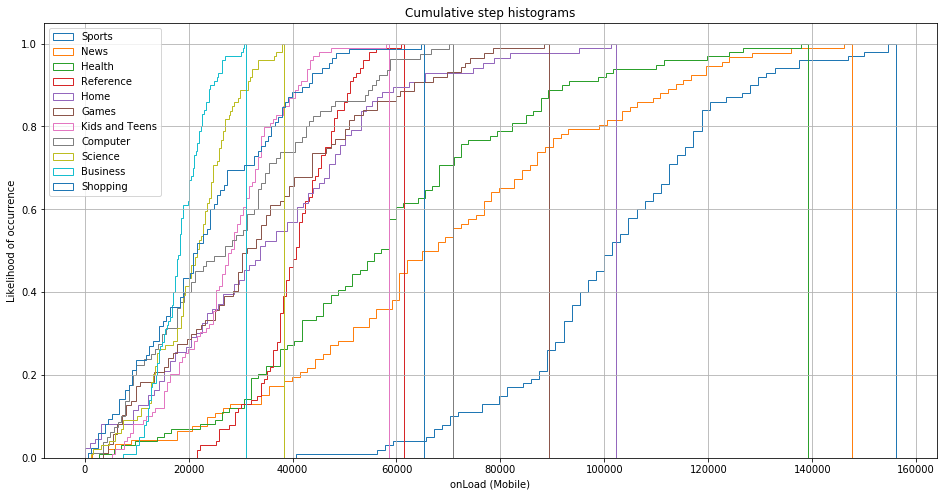

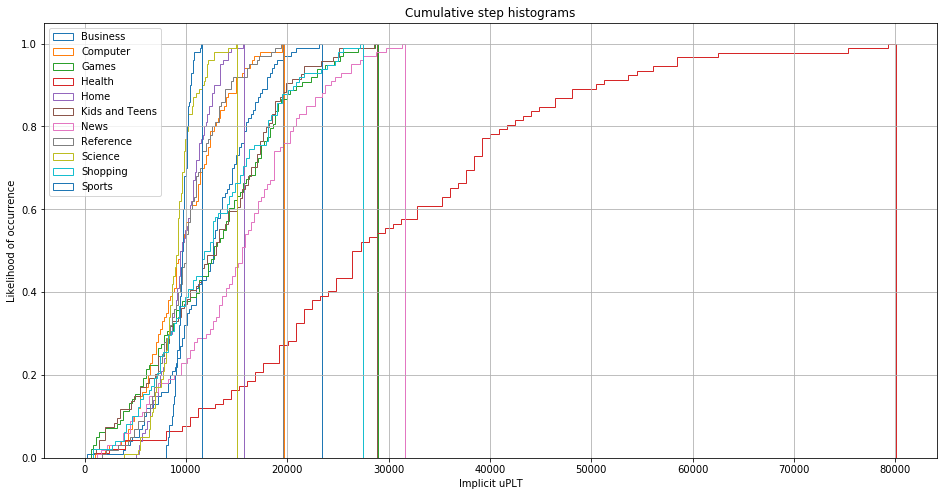

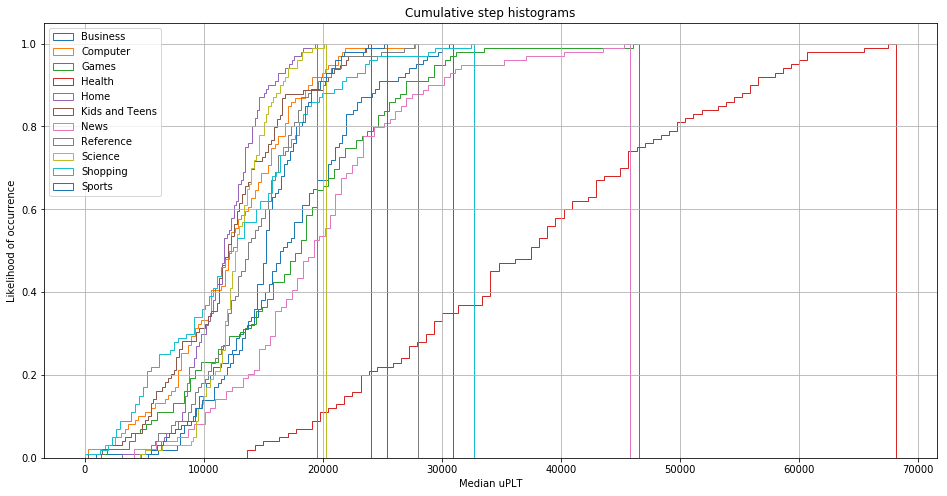

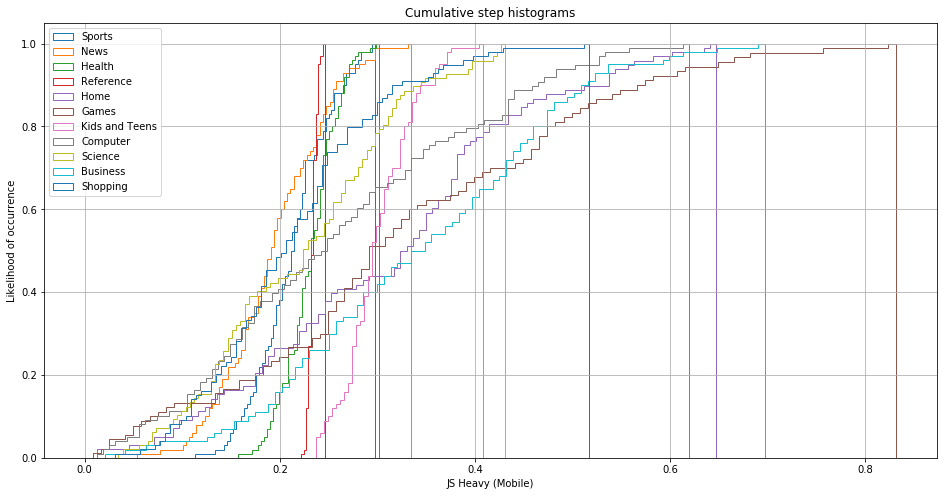

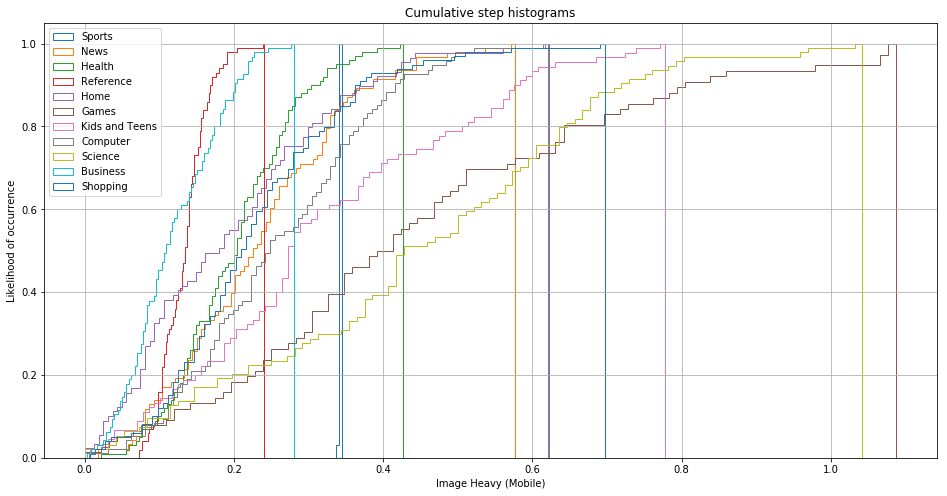

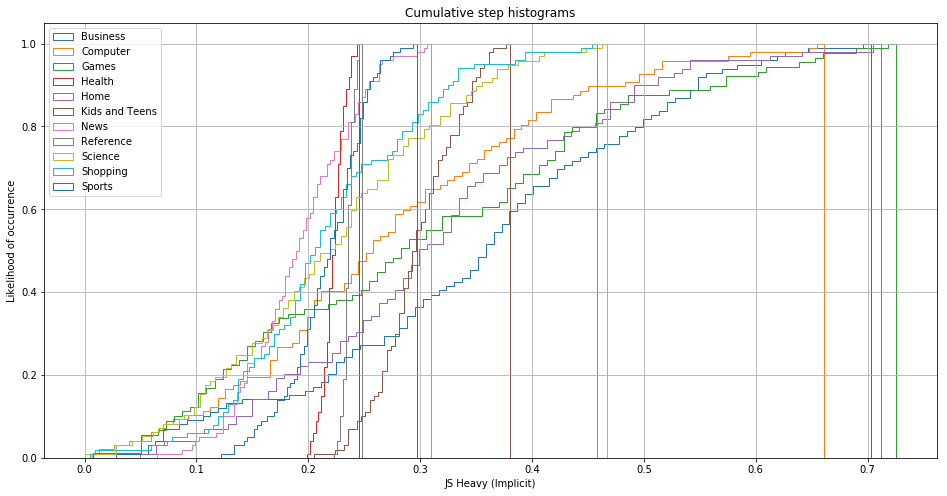

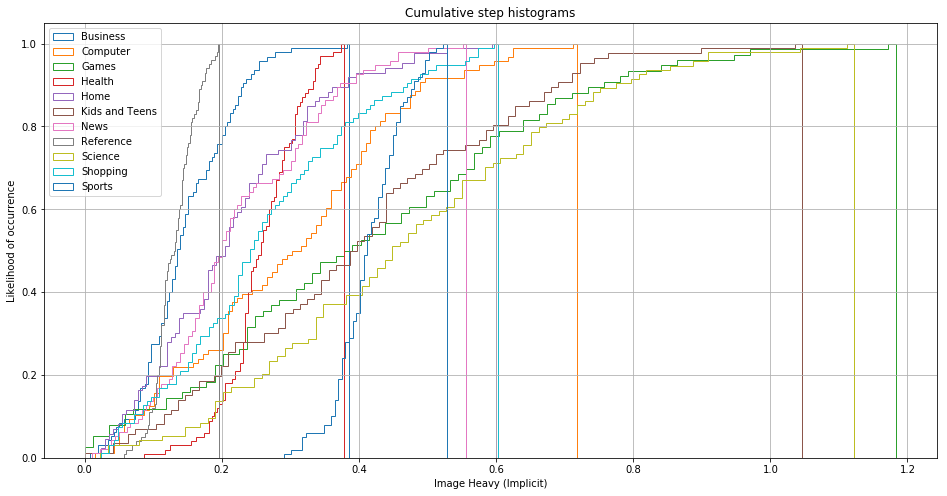

In [5]:
np.random.seed(0)

#mu = 200
#sigma = 25
n_bins = 100

fig5, ax5 = plt.subplots(figsize=(16, 8))
fig6, ax6 = plt.subplots(figsize=(16, 8))
fig7, ax7 = plt.subplots(figsize=(16, 8))
fig, ax = plt.subplots(figsize=(16, 8))
fig2, ax2 = plt.subplots(figsize=(16, 8))
fig3, ax3 = plt.subplots(figsize=(16, 8))
fig4, ax4 = plt.subplots(figsize=(16, 8))


for index,row in df_mobile_new.iterrows():
    
    if not math.isnan(row['js_std']):
        #print (row['js_std'])
        x = np.random.normal(row['js_mean'], row['js_std'], size=100)
        n, bins, patches = ax.hist(x, n_bins, normed=1, histtype='step',
                           cumulative=True, label=row['category'],range=(0, x.max()))
        
    if not math.isnan(row['img_std']):
        #print (row['js_std'])
        x2 = np.random.normal(row['img_mean'], row['img_std'], size=100)
        n2, bins2, patches2 = ax2.hist(x2, n_bins, normed=1, histtype='step',
                           cumulative=True, label=row['category'], range=(0, x2.max()))
        
    if not math.isnan(row['value_std']):
        #print (row['js_std'])
        x5 = np.random.normal(row['value_mean'], row['value_std'], size=100)
        n5, bins5, patches5 = ax5.hist(x5, n_bins, normed=1, histtype='step',
                           cumulative=True, label=row['category'],range=(0, x5.max()))

for index,row in df_implicit_new.iterrows():
    
    if not math.isnan(row['js_std']):
        #print (row['js_std'])
        x3 = np.random.normal(row['js_mean'], row['js_std'], size=100)
        n3, bins3, patches3 = ax3.hist(x3, n_bins, normed=1, histtype='step',
                           cumulative=True, label=row['category'], range=(0, x3.max()))
        
    if not math.isnan(row['img_std']):
        #print (row['js_std'])
        x4 = np.random.normal(row['img_mean'], row['img_std'], size=100)
        n4, bins4, patches4 = ax4.hist(x4, n_bins, normed=1, histtype='step',
                           cumulative=True, label=row['category'], range=(0, x4.max()))
    
    if not math.isnan(row['value_std']):
        #print (row['js_std'])
        x6 = np.random.normal(row['value_mean'], row['value_std'], size=100)
        n6, bins6, patches6 = ax6.hist(x6, n_bins, normed=1, histtype='step',
                           cumulative=True, label=row['category'], range=(0, x6.max()))
        
for index,row in df_median_new.iterrows():
    
    if not math.isnan(row['value_std']):
        #print (row['js_std'])
        x7 = np.random.normal(row['value_mean'], row['value_std'], size=100)
        n7, bins7, patches7 = ax7.hist(x7, n_bins, normed=1, histtype='step',
                           cumulative=True, label=row['category'], range=(0, x7.max()))
    
# x = np.random.normal(mu, sigma, size=100)
# x1 = np.random.normal(100, 25, size=100)

# fig, ax = plt.subplots(figsize=(8, 4))

# # plot the cumulative histogram
# n, bins, patches = ax.hist(x, n_bins, normed=1, histtype='step',
#                            cumulative=True, label='First')
# n, bins, patches = ax.hist(x1, n_bins, normed=1, histtype='step',
#                            cumulative=True, label='Second')

# Add a line showing the expected distribution.
#y = mlab.normpdf(bins, mu, sigma).cumsum()
#y /= y[-1]

#ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# Overlay a reversed cumulative histogram.
#ax.hist(x, bins=bins, normed=1, histtype='step', cumulative=-1,
 #       label='Reversed emp.')

# tidy up the figure

ax5.grid(True)
ax5.legend(loc='upper left')
ax5.set_title('Cumulative step histograms')
ax5.set_xlabel('onLoad (Mobile)')
ax5.set_ylabel('Likelihood of occurrence')

ax6.grid(True)
ax6.legend(loc='upper left')
ax6.set_title('Cumulative step histograms')
ax6.set_xlabel('Implicit uPLT')
ax6.set_ylabel('Likelihood of occurrence')

ax7.grid(True)
ax7.legend(loc='upper left')
ax7.set_title('Cumulative step histograms')
ax7.set_xlabel('Median uPLT')
ax7.set_ylabel('Likelihood of occurrence')

ax.grid(True)
ax.legend(loc='upper left')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('JS Heavy (Mobile)')
ax.set_ylabel('Likelihood of occurrence')

ax2.grid(True)
ax2.legend(loc='upper left')
ax2.set_title('Cumulative step histograms')
ax2.set_xlabel('Image Heavy (Mobile)')
ax2.set_ylabel('Likelihood of occurrence')

ax3.grid(True)
ax3.legend(loc='upper left')
ax3.set_title('Cumulative step histograms')
ax3.set_xlabel('JS Heavy (Implicit)')
ax3.set_ylabel('Likelihood of occurrence')

ax4.grid(True)
ax4.legend(loc='upper left')
ax4.set_title('Cumulative step histograms')
ax4.set_xlabel('Image Heavy (Implicit)')
ax4.set_ylabel('Likelihood of occurrence')

plt.show()




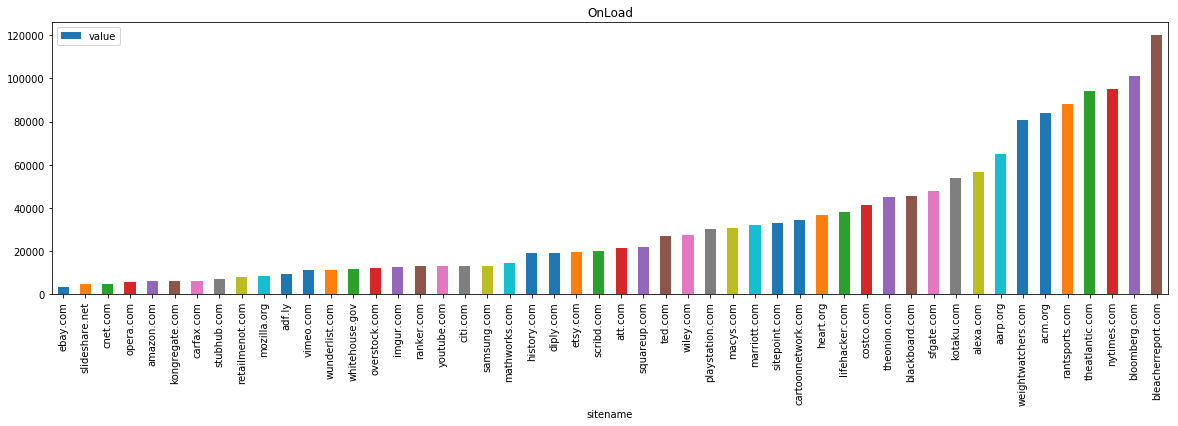

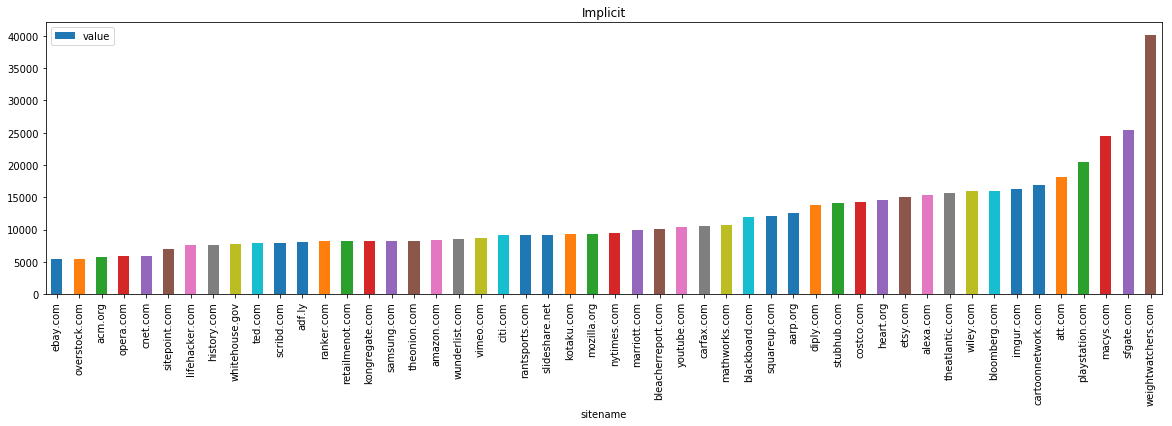

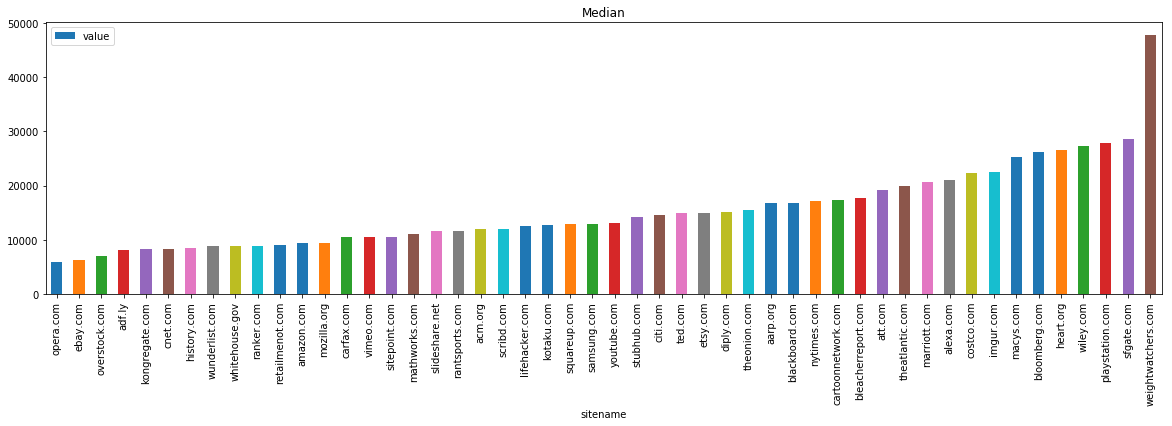

In [7]:
df_scroll_mobile = df_scroll_mobile.sort_values('value')
df_scroll_implicit = df_scroll_implicit.sort_values('value')
df_scroll_median = df_scroll_median.sort_values('value')

df_scroll_mobile.plot(kind='bar', x ='sitename', y ='value',title= 'OnLoad')
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

df_scroll_implicit.plot(kind='bar', x ='sitename', y ='value',title= 'Implicit')
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

df_scroll_median.plot(kind='bar', x ='sitename', y ='value',title= 'Median')
plt.rcParams["figure.figsize"] = (20,5)
plt.show()